In [1]:
import pandas

root_dir = "/nas/tirr/waterbird/waterbird_landfraction50_forest2water2/"
save_dir = "/nas/tirr/waterbird/"
def load_waterbird():
    # load waterbird images path
    train_img_folder = root_dir + 'train/real/'
    train_metadata_csv = pandas.read_csv(root_dir + 'train_real_metadata.csv')
    train_metadata_csv['img_filename_no_path'] = train_metadata_csv['img_filename'].apply(lambda x: x.split('/')[-1])
    train_test_img_files = []
    for _, row in train_metadata_csv.iterrows():
        train_test_img_files.append(train_img_folder + row['img_filename_no_path'])

    test_img_folder = root_dir + 'test/'
    test_metadata_csv = pandas.read_csv(root_dir + 'test_metadata.csv')
    test_metadata_csv['img_filename_no_path'] = test_metadata_csv['img_filename'].apply(lambda x: x.split('/')[-1])
    for _, row in test_metadata_csv.iterrows():
        train_test_img_files.append(test_img_folder + row['img_filename_no_path'])
    numtrain_test = len(train_test_img_files)

    val_img_folder = root_dir + 'val/'
    val_metadata_csv = pandas.read_csv(root_dir + 'val_metadata.csv')
    val_metadata_csv['img_filename_no_path'] = val_metadata_csv['img_filename'].apply(lambda x: x.split('/')[-1])
    val_img_files = []
    for _, row in val_metadata_csv.iterrows():   
        val_img_files.append(val_img_folder + row['img_filename_no_path'])
    numQ = len(val_img_files)

    print("numtrain_test:", numtrain_test)
    print("numQ:", numQ)
    return train_test_img_files, val_img_files

train_test_img_files, val_img_files = load_waterbird()
print(train_test_img_files[:5])

numtrain_test: 10589
numQ: 1199
['/nas/tirr/waterbird/waterbird_landfraction50_forest2water2/train/real/Black_Footed_Albatross_0074_59.jpg', '/nas/tirr/waterbird/waterbird_landfraction50_forest2water2/train/real/Black_Footed_Albatross_0014_89.jpg', '/nas/tirr/waterbird/waterbird_landfraction50_forest2water2/train/real/Black_Footed_Albatross_0031_100.jpg', '/nas/tirr/waterbird/waterbird_landfraction50_forest2water2/train/real/Black_Footed_Albatross_0010_796097.jpg', '/nas/tirr/waterbird/waterbird_landfraction50_forest2water2/train/real/Black_Footed_Albatross_0023_796059.jpg']


(500, 415, 3)


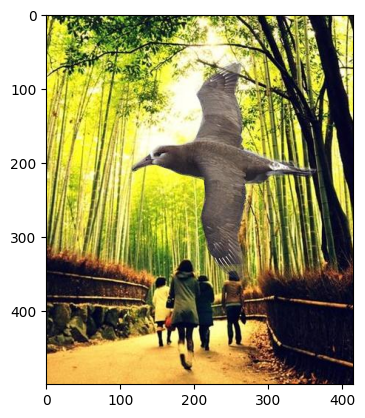

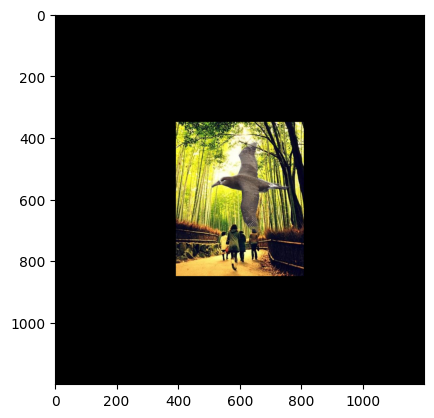

In [2]:
# pad the images with black pixels to make them square
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_size = 1200

for train_test_img in train_test_img_files:
    image = Image.open(train_test_img)
    # convert image to numpy array
    data = np.asarray(image)
    print(data.shape)
    # pad the image to make it 700x700
    h, w, c = data.shape
    pad_h = (img_size - h) // 2
    pad_w = (img_size - w) // 2
    padded_data = np.zeros((img_size, img_size, c), dtype=np.uint8)
    padded_data[pad_h:pad_h+h, pad_w:pad_w+w] = data
    padded_image = Image.fromarray(padded_data)
    
    plt.imshow(image)
    plt.show()
    plt.imshow(padded_image)
    plt.show()
    break


